# Statistic for AI and Data Science
# Coursework 3

**1.1 The Data on English Property Prices**
The file average-property-price.csv has information about the average price of
properties (there are 4 types of properties) over 36 months in different areas of the country.
The dataset contains the following fields:


Name - Description
Date A date, which is the first of the month, between September 1st 2016
and August 1st 2019. 36 months in total.

Area - The name of an area (or region – see below)

Code - The code for the area (or region – see below)

Detached - Average sale price of a detached property in this area in the month

Semi - Same, for semi-detached property.

Terraced - Same, for a terraced property

Flat - Same, for a flat.

**1.2 Understanding the Region / Area**

Each area of the country is covered twice, at different levels.
- Level 1 is a region. There are 9 regions in England (examples are ‘London’, ‘South
East’, ‘South West’).
- Level 2 is a local government area. There are 4 different types of local government
areas, though the distinction is not important in our analysis. Each area belongs to
one of the regions.

The following table shows the prefixes of the Area Code and the corresponding level.

Code Prefix Classification Level Description

E12 English Region 1 One of 9 different English regions


Local government area. Parts of a
region.

E10 County 2

E09 London Borough 2

E08 Metropolitan Boroughs 2

E06 English unitary authority 2


**1.3 Relationship Between Area and Region**
A separate file location-codes.csv shows which region each area belongs to. Note
that here is some overlap between the two files, such as the names of the areas and
regions. This file can be used to determine which of the 9 regions each area is in.




**2.1 Part 1: Load and prepare the data**
As described above, the data file includes both data for areas and for regions. Both region
data and area data are needed below, but they need to be separated (into separate data
frames).
- Separate the region data (with ‘E12’ prefix codes) from the area data (other
prefixes).
- Use the ‘location code’ data file to add to each area price record the region to which
the area belongs, ensuring that all areas have been assigned a region.
- Check the data for missing values in the region or area data; decide how to act.
giving a clearly description and justification. \


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# reading the average property price data with correct date parsing
average_property_price_df = pd.read_csv('average-property-price.csv')
average_property_price_df['Month'] = pd.to_datetime(average_property_price_df['Date'], dayfirst=True)
average_property_price_df.drop('Date', axis=1, inplace=True)

# Reading the data
location_codes_df = pd.read_csv('location-codes.csv')


# Display the first few rows of each dataframe for review
average_property_price_df.head(), location_codes_df.head()


(         Area       Code     Detached         Semi     Terraced         Flat  \
 0  Hartlepool  E06000001  179323.3934  108357.4457  77192.90613  62078.20672   
 1  Hartlepool  E06000001  178880.9745  107765.1346  76294.05974  61893.84174   
 2  Hartlepool  E06000001  179855.0608  107886.9468  76066.73993  61909.33647   
 3  Hartlepool  E06000001  182847.8194  109312.3743  77019.16134  62919.44401   
 4  Hartlepool  E06000001  177454.1433  105828.3642  74522.27530  60770.80795   
 
        Month  
 0 2016-09-01  
 1 2016-10-01  
 2 2016-11-01  
 3 2016-12-01  
 4 2017-01-01  ,
   AuthorityCode         AuthorityName RegionCode  RegionName
 0     E06000001            Hartlepool  E12000001  North East
 1     E06000002         Middlesbrough  E12000001  North East
 2     E06000003  Redcar and Cleveland  E12000001  North East
 3     E06000004      Stockton-on-Tees  E12000001  North East
 4     E06000005            Darlington  E12000001  North East)

In [93]:
# separating region data (with 'E12' prefix) from area data (other prefixes)
region_data_df = average_property_price_df[average_property_price_df['Code'].str.startswith('E12')]
area_data_df = average_property_price_df[~average_property_price_df['Code'].str.startswith('E12')]

region_data_df

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


In [94]:
area_data_df

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01


In [95]:
# Merging the area data with the location codes to add the region information
area_data_with_region_df = pd.merge(area_data_df, location_codes_df, left_on='Code', right_on='AuthorityCode')

area_data_with_region_df

,Area,Code,Detached,Semi,Terraced,Flat,Month,AuthorityCode,AuthorityName,RegionCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E06000001,Hartlepool,E12000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E06000001,Hartlepool,E12000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E06000001,Hartlepool,E12000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E06000001,Hartlepool,E12000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E06000001,Hartlepool,E12000001,North East
...,...,...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E10000034,Worcestershire,E12000005,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E10000034,Worcestershire,E12000005,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E10000034,Worcestershire,E12000005,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E10000034,Worcestershire,E12000005,West Midlands


In [96]:
# Checking for missing values in both datasets again
missing_values_region = region_data_df.isnull().sum()
missing_values_area = area_data_with_region_df.isnull().sum()

missing_values_region, missing_values_area

(Area        0
 Code        0
 Detached    0
 Semi        0
 Terraced    0
 Flat        0
 Month       0
 dtype: int64,
 Area              0
 Code              0
 Detached         36
 Semi             36
 Terraced         20
 Flat              0
 Month             0
 AuthorityCode     0
 AuthorityName     0
 RegionCode        0
 RegionName        0
 dtype: int64)

In [97]:
# Calculating monthly regional averages for each property type
monthly_regional_averages = area_data_with_region_df.groupby(['RegionName', 'Month']).median().reset_index()

# Preparing to impute missing values for 'City of London' using these averages
city_of_london_data = area_data_with_region_df[area_data_with_region_df['Area'] == 'City of London']

# Imputing missing values
for property_type in ['Detached', 'Semi', 'Terraced', 'Flat']:
    # For each month, fill the missing values in 'City of London' with the regional average for that month
    for month in city_of_london_data['Month'].unique():
        avg_value = monthly_regional_averages[(monthly_regional_averages['RegionName'] == 'London') &
                                              (monthly_regional_averages['Month'] == month)][property_type].values[0]
        city_of_london_data.loc[(city_of_london_data['Month'] == month) & (city_of_london_data[property_type].isna()),
                                property_type] = avg_value

# Updating the main DataFrame
area_data_with_region_df.update(city_of_london_data)

# Checking the updated values for 'City of London'
area_data_with_region_df[area_data_with_region_df['Area'] == 'City of London']




C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\1774508939.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_regional_averages = area_data_with_region_df.groupby(['RegionName', 'Month']).median().reset_index()


,Area,Code,Detached,Semi,Terraced,Flat,Month,AuthorityCode,AuthorityName,RegionCode,RegionName
3276,City of London,E09000001,9.417038e+05,651222.36840,1.189234e+06,777891.9778,2016-09-01,E09000001,City of London,E12000007,London
3277,City of London,E09000001,9.501241e+05,646967.95295,1.195010e+06,790055.2118,2016-10-01,E09000001,City of London,E12000007,London
3278,City of London,E09000001,9.650954e+05,643418.58065,1.229508e+06,815992.8991,2016-11-01,E09000001,City of London,E12000007,London
3279,City of London,E09000001,9.631168e+05,650207.47910,1.217013e+06,809149.8515,2016-12-01,E09000001,City of London,E12000007,London
3280,City of London,E09000001,9.708825e+05,651172.15735,1.227435e+06,817654.0898,2017-01-01,E09000001,City of London,E12000007,London
3281,City of London,E09000001,9.617803e+05,647916.64550,1.189660e+06,818093.5200,2017-02-01,E09000001,City of London,E12000007,London
3282,City of London,E09000001,9.400458e+05,650105.29385,1.176573e+06,851416.0699,2017-03-01,E09000001,City of London,E12000007,London
3283,City of London,E09000001,9.373801e+05,642751.40620,1.238739e+06,903551.8492,2017-04-01,E09000001,City of London,E12000007,London
3284,City of London,E09000001,9.432148e+05,645702.15060,1.277796e+06,937307.4240,2017-05-01,E09000001,City of London,E12000007,London
3285,City of London,E09000001,9.513675e+05,644787.76425,1.174213e+06,928316.5022,2017-06-01,E09000001,City of London,E12000007,London


In [98]:
# Checking for missing values in both datasets again
missing_values_region = region_data_df.isnull().sum()
missing_values_area = area_data_with_region_df.isnull().sum()

missing_values_region, missing_values_area

(Area        0
 Code        0
 Detached    0
 Semi        0
 Terraced    0
 Flat        0
 Month       0
 dtype: int64,
 Area             0
 Code             0
 Detached         0
 Semi             0
 Terraced         0
 Flat             0
 Month            0
 AuthorityCode    0
 AuthorityName    0
 RegionCode       0
 RegionName       0
 dtype: int64)

Description and justification for the method chosen to handle the missing values in the 'City of London' area of your dataset:


**Imputation Using Monthly Regional Averages:**

- **Calculation:**
  - First, calculated the average prices for each property type ('Detached', 'Semi', 'Terraced', 'Flat') within the 'London' region for every month. This was done by grouping the dataset by 'RegionName' and 'Month' and then computing the mean for these property types.

- **Imputation Process:**
  - For the 'City of London' area, where the data was missing, used these calculated monthly averages to fill in the missing values. This approach was applied separately for each property type.
  - For each month, if a property type had a missing value in the 'City of London' data, it was replaced with the corresponding monthly average value from the broader 'London' region.

- **Verification:**
  - Finally, checked the first few rows of the updated 'City of London' data to ensure that the missing values were appropriately filled.

### Justification for the Method:


   - By using the monthly regional averages from the 'London' region, this method ensures that the imputed values are contextually relevant and accurately reflect the property market dynamics specific to London. It accounts for both regional characteristics and temporal variations.

   - The 'City of London' is a crucial area in the dataset, and its exclusion would have resulted in a significant loss of information. Imputation allows for the retention and utilization of this data in the analysis, enhancing the overall comprehensiveness and utility of the dataset.

   - The chosen method of imputing missing values using monthly regional averages is both statistically robust and contextually appropriate. It enhances the dataset's accuracy, making it more suitable for detailed and reliable analysis of property price trends in London. This methodological choice is crucial for maintaining the integrity of analysis and supporting any conclusions drawn from the dataset.




**2.2 Part 2: Trends**
Use the region data in this section to look at some trends.
- Plot trends of the prices, considering only flats and detached properties. The plots
should cover the prices in the 9 regions over the 36 months.
- Choose a number / variety of plots so that the trends can be easily understood and
compared.
- Comment on the trends. Compare the regions, the two property types and different
times of year

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Filtering the dataset for flats and detached properties
flats_detached_region_df = region_data_df[['Month', 'Code', 'Flat', 'Detached']]

# Creating a dictionary to map region codes to their names
region_name_dict = location_codes_df.set_index('RegionCode')['RegionName'].to_dict()

# Get unique region codes
region_codes = flats_detached_region_df['Code'].unique()

# Calculating the dimensions for the subplot grid
num_regions = len(region_codes)
num_columns = 2
num_rows = (num_regions + 1) // num_columns



C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\955573131.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Month', y='Flat', label='Flat', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\955573131.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Month', y='Detached', label='Detached', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\955573131.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Month', y='Flat', label='Flat', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\955573131.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Month', y='Detached', label='Detached', ci=None)
C:\Users\aashi\AppData\Local\Tem

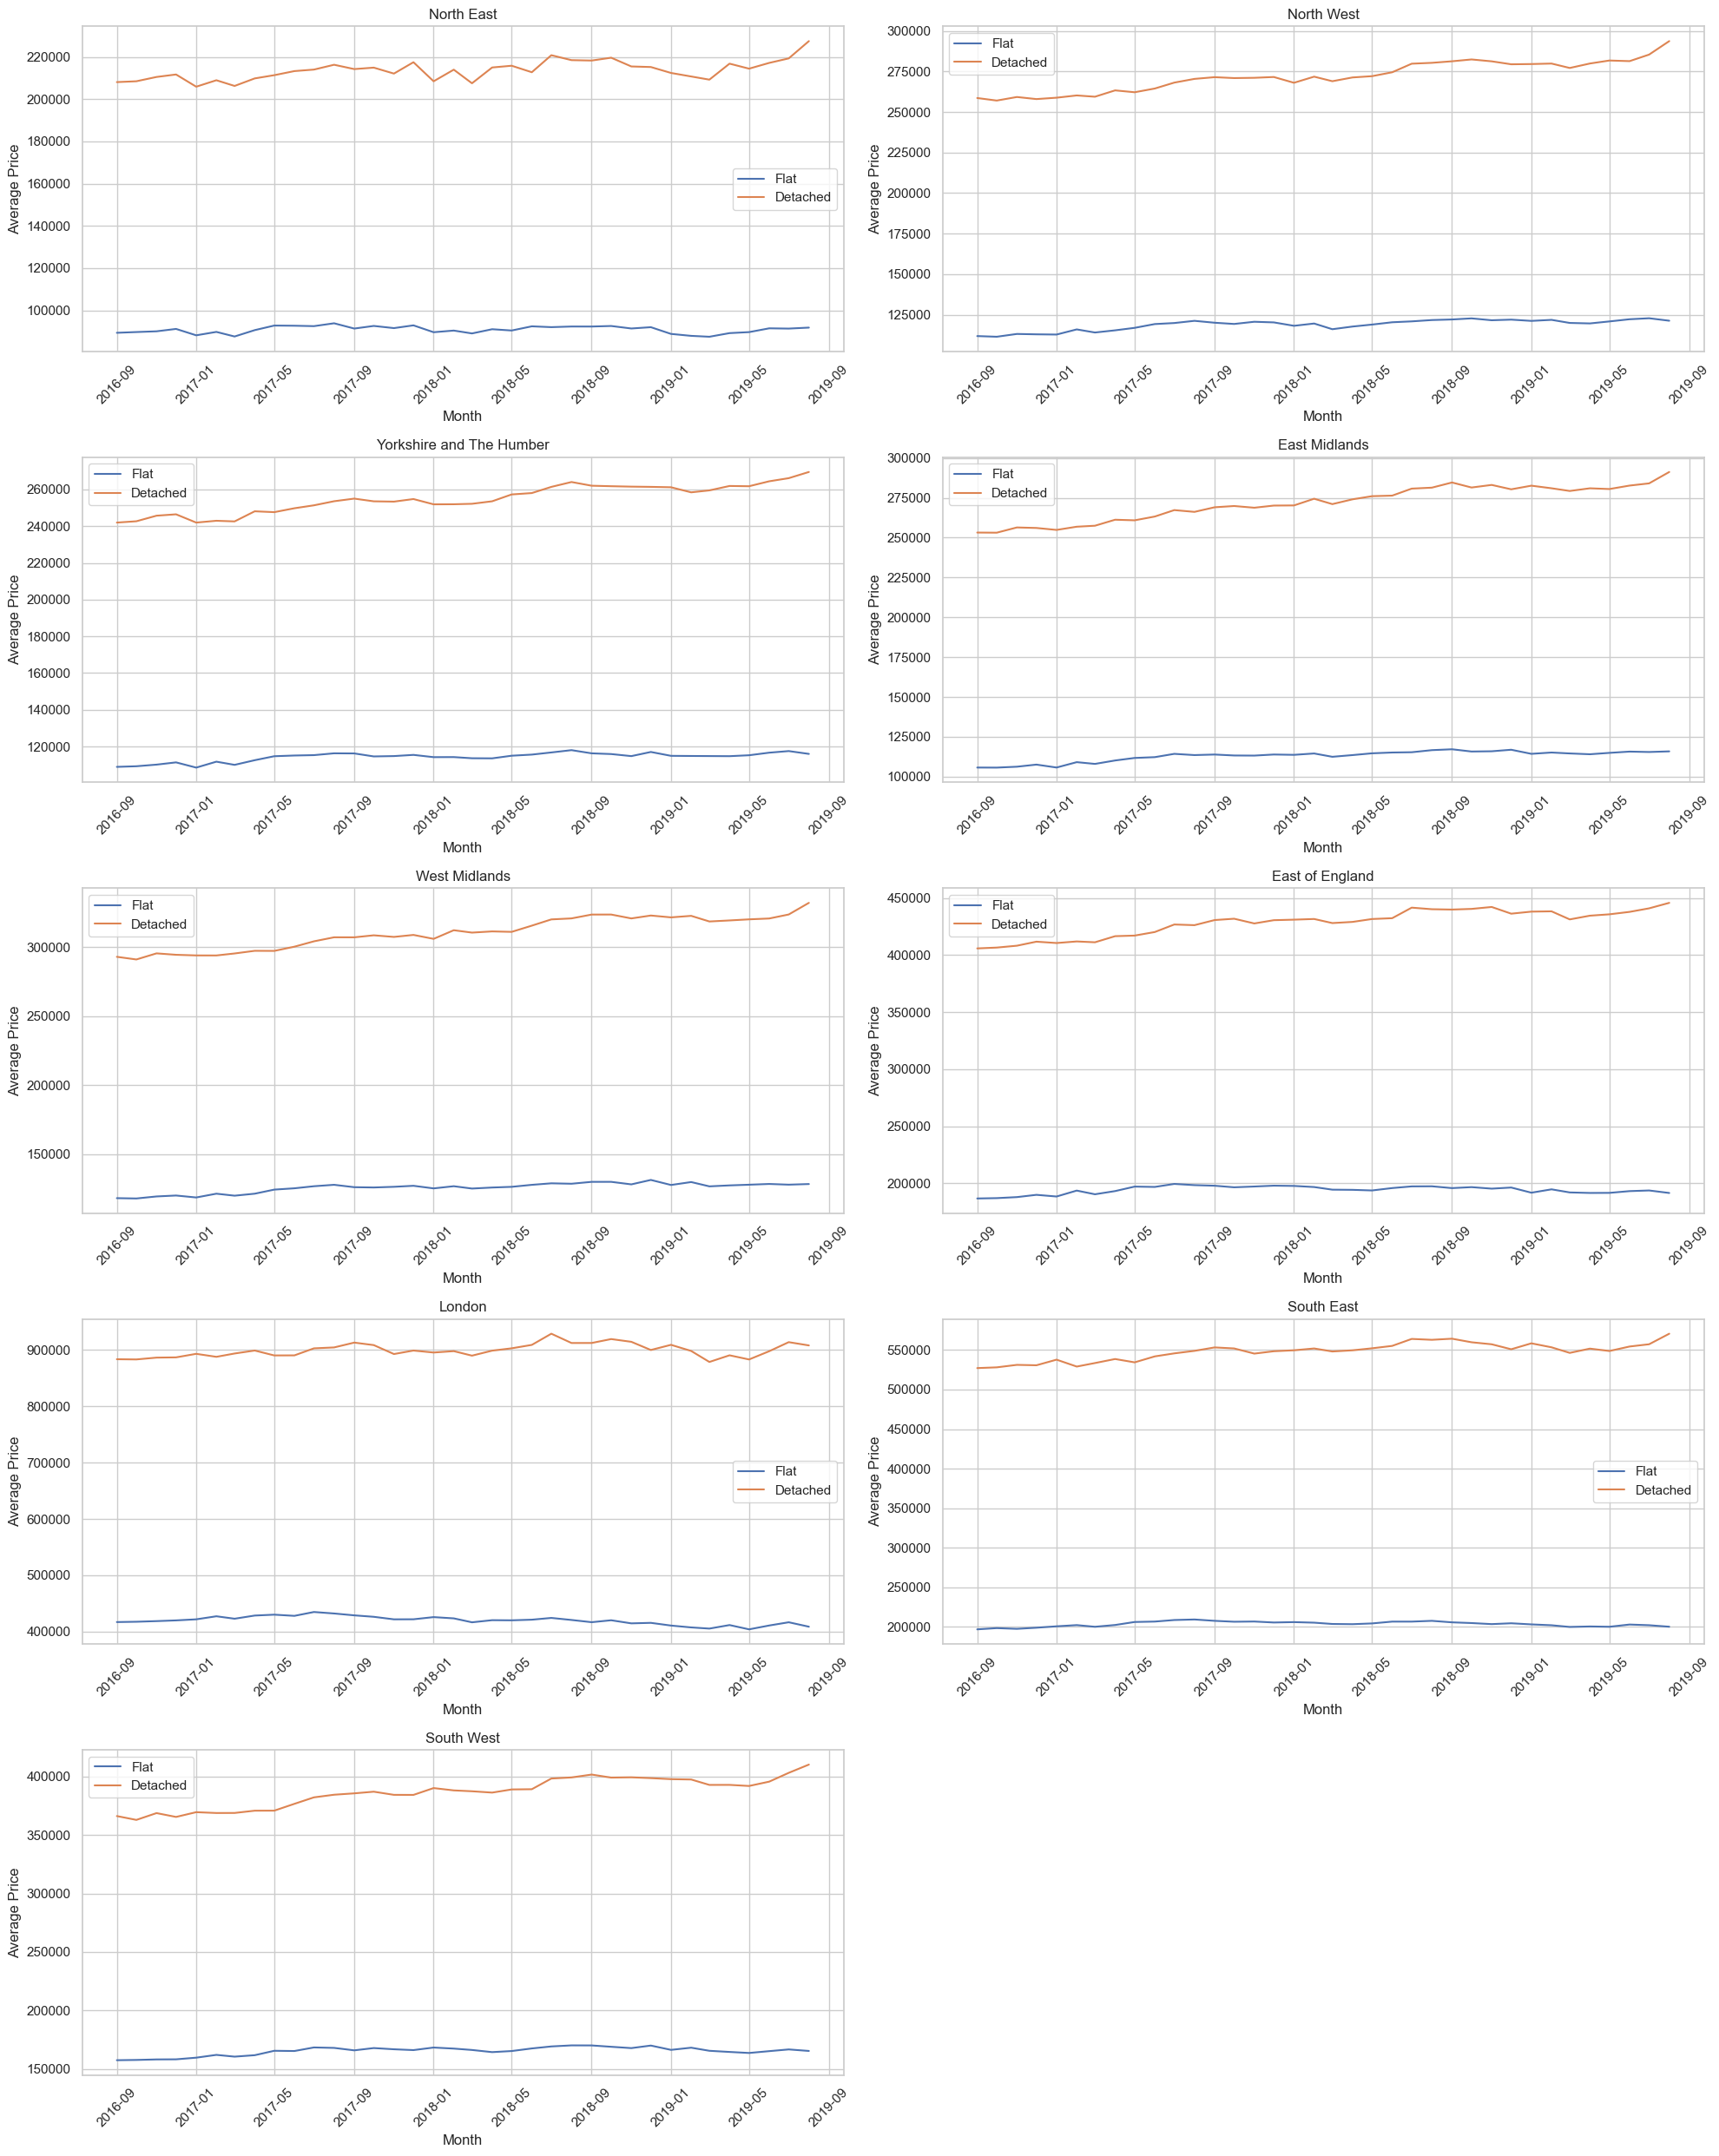

In [100]:
# Setting up the figure for line plots with region names
plt.figure(figsize=(20, num_rows * 5))

# Line Plots for Each Region with Region Names
for i, code in enumerate(region_codes, 1):
    plt.subplot(num_rows, num_columns, i)
    region_subset = flats_detached_region_df[flats_detached_region_df['Code'] == code]
    sns.lineplot(data=region_subset, x='Month', y='Flat', label='Flat', ci=None)
    sns.lineplot(data=region_subset, x='Month', y='Detached', label='Detached', ci=None)
    plt.title(region_name_dict.get(code, 'Unknown Region'))
    plt.xlabel('Month')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()



C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\3130403739.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_prices = flats_detached_region_df.groupby('Code').mean().reset_index()


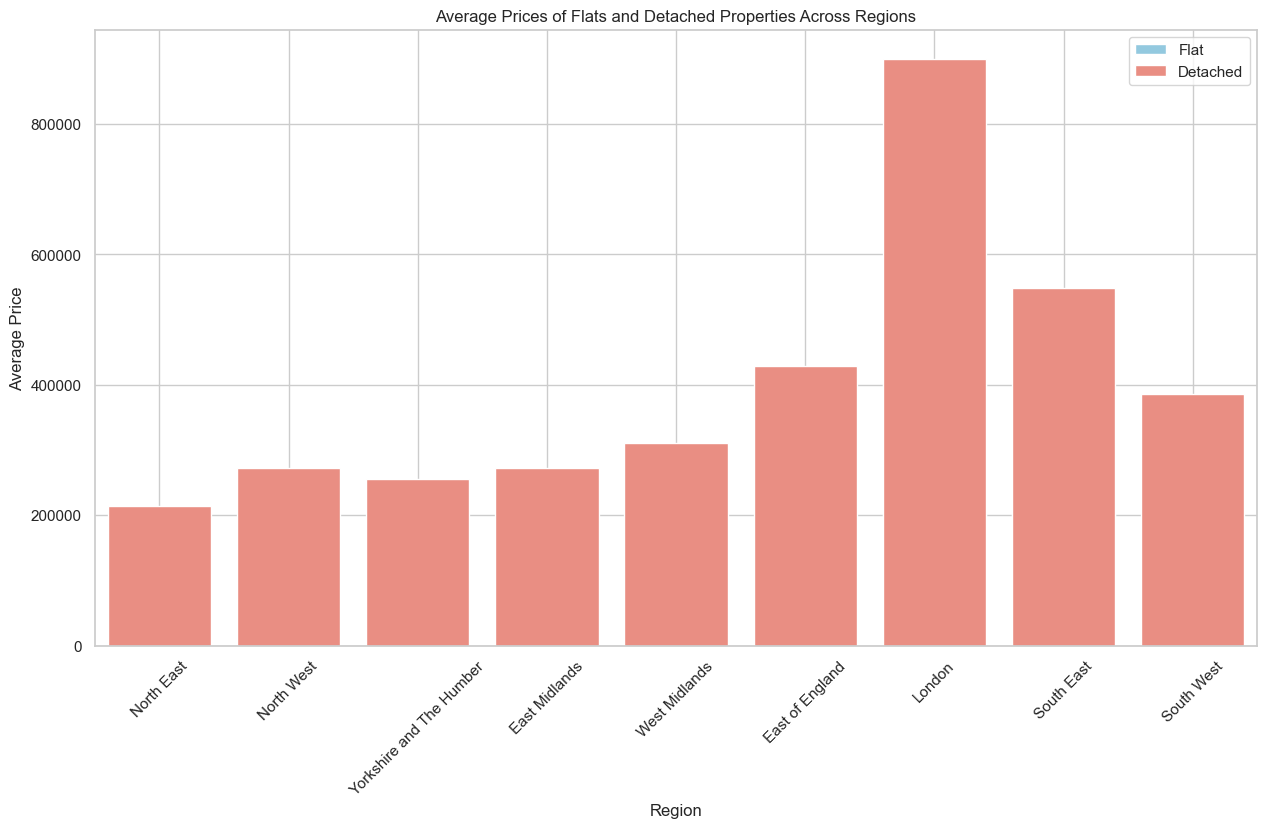

In [101]:
# Bar Charts for Average Prices with Region Names
# Replacing region codes with names in the average prices DataFrame
avg_prices = flats_detached_region_df.groupby('Code').mean().reset_index()
avg_prices['RegionName'] = avg_prices['Code'].map(region_name_dict)

# Setting up the figure for bar charts with region names
plt.figure(figsize=(15, 8))

# Bar plot for flats with region names
sns.barplot(data=avg_prices, x='RegionName', y='Flat', color='skyblue', label='Flat')

# Bar plot for detached houses with region names
sns.barplot(data=avg_prices, x='RegionName', y='Detached', color='salmon', label='Detached')

plt.title('Average Prices of Flats and Detached Properties Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


### Insights:

**Pricing Disparity Between Property Types:**
   - Across all regions, detached properties are priced higher than flats. This reflects the greater space and amenities offered by detached properties.

**Pricing Variations:**
   - There is a clear variation in price levels between different regions. For instance, London exhibits significantly higher property prices for both flats and detached properties compared to other regions, which is indicative of the high demand.

**Price Stability:**
   - The prices of flats and detached properties appear relatively stable over time within each region, without  fluctuations. This suggests a stable property market during the observed period.




### Conclusion:

The visualized data provide valuable insights into the housing market's behavior across different regions, showing the variations and trends that could impact buyers, sellers, investors, and policymakers. The overall trend indicates a stable to a slightly increasing market.



C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2803613942.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Quarter', y='Flat', label='Flat', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2803613942.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Quarter', y='Detached', label='Detached', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2803613942.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Quarter', y='Flat', label='Flat', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2803613942.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Quarter', y='Detached', label='Detached', ci=None)
C:\Users\aashi\A

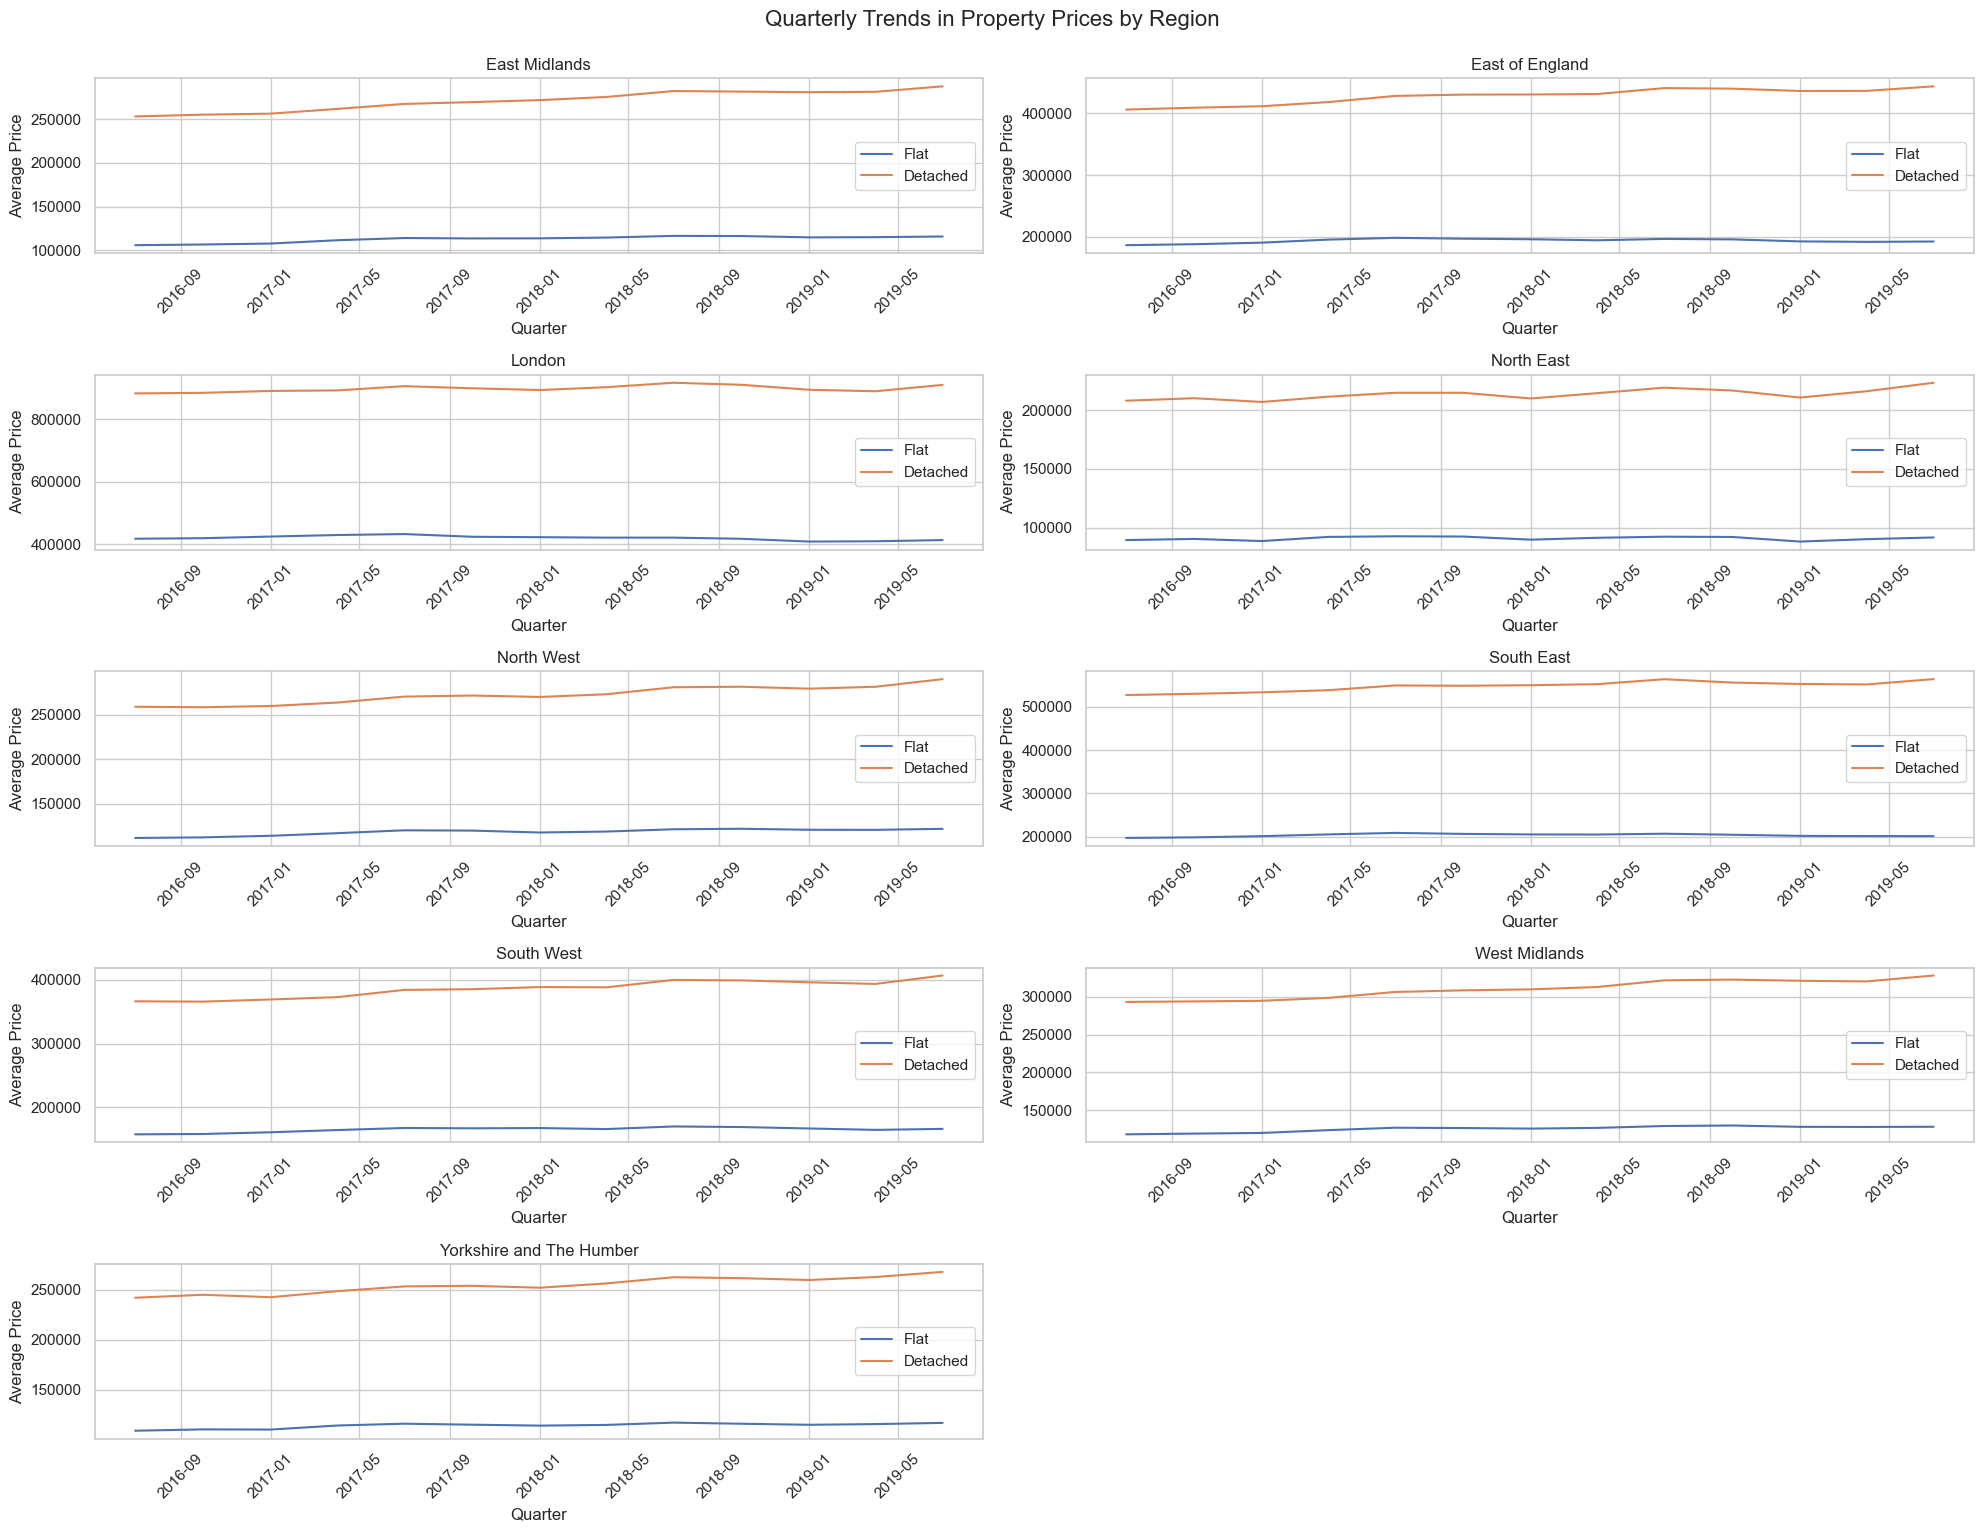

In [102]:
# Merging region data with location codes data to include 'RegionName'
region_data_with_names_df = pd.merge(region_data_df, location_codes_df[['RegionCode', 'RegionName']],
                                     left_on='Code', right_on='RegionCode', how='left')

# Aggregating data to the quarterly level
region_data_with_names_df['Quarter'] = region_data_with_names_df['Month'].dt.to_period('Q').dt.to_timestamp()
quarterly_data_with_names = region_data_with_names_df.groupby(['Quarter', 'RegionName'])[['Flat', 'Detached']].mean().reset_index()

# Setting up the figure for subplots
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

for i, region in enumerate(quarterly_data_with_names['RegionName'].unique()):
    plt.subplot(num_rows, num_columns, i+1)
    region_subset = quarterly_data_with_names[quarterly_data_with_names['RegionName'] == region]

    sns.lineplot(data=region_subset, x='Quarter', y='Flat', label='Flat', ci=None)
    sns.lineplot(data=region_subset, x='Quarter', y='Detached', label='Detached', ci=None)

    plt.title(region)
    plt.xlabel('Quarter')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Quarterly Trends in Property Prices by Region', fontsize=16, y=1.02)
plt.show()

**The provided visualization of quarterly trends in property prices by region presents a clear depiction of how the prices of flats and detached properties have changed over time across different regions.**

   - Across all regions, detached properties are consistently priced higher than flats, which aligns with the general market trend that detached properties often offer more space and privacy.

   - Most regions exhibit a stable trend in property prices for both flats and detached properties, with no drastic fluctuations. This indicates a relatively steady market during the observed quarters.

   - There are distinct differences in average prices between regions. London, for instance, has a significantly higher price range for both property types, which is of its status as a high-demand area with a more expensive housing market.

   - Some regions show slight upward trends over the observed quarters. This could be due to economic growth, increased demand for housing, or inflation.

   - The general lack of downward trends suggests resilience in the property market across these regions, potentially reflecting strong economic fundamentals or effective market regulation.


C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2193366657.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Year', y='Flat', label='Flat', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2193366657.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Year', y='Detached', label='Detached', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2193366657.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Year', y='Flat', label='Flat', ci=None)
C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\2193366657.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=region_subset, x='Year', y='Detached', label='Detached', ci=None)
C:\Users\aashi\AppData\Local

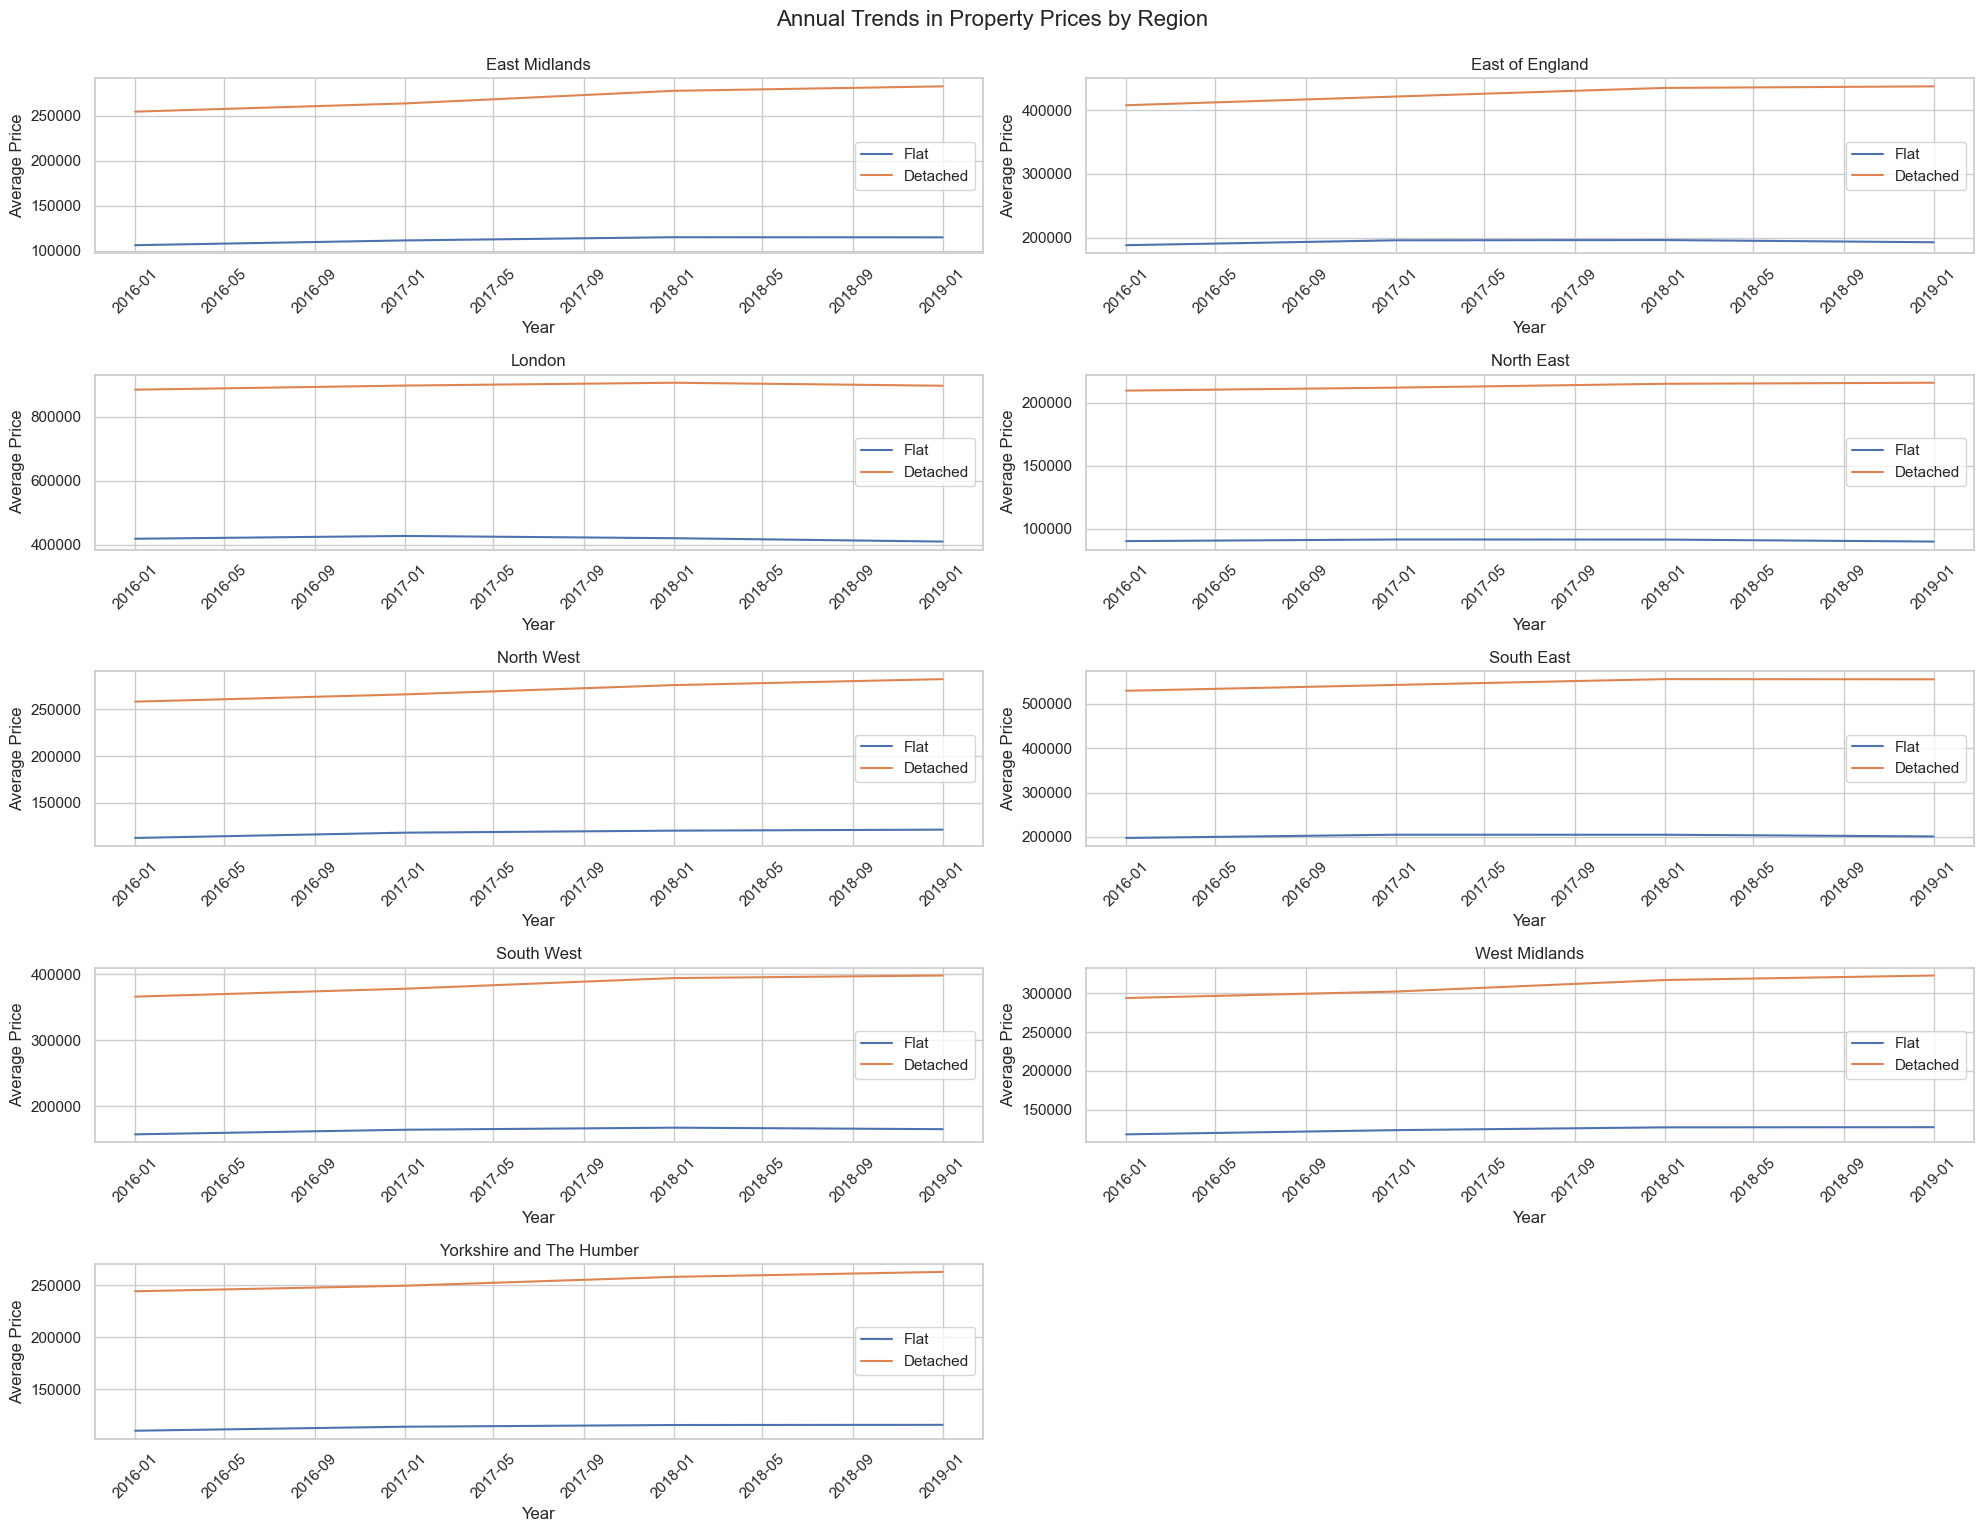

In [103]:
# Aggregating data to the annual level
region_data_with_names_df['Year'] = region_data_with_names_df['Month'].dt.to_period('Y').dt.to_timestamp()
annual_data_with_names = region_data_with_names_df.groupby(['Year', 'RegionName'])[['Flat', 'Detached']].mean().reset_index()

# Setting up the figure for annual subplots
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")

for i, region in enumerate(annual_data_with_names['RegionName'].unique()):
    plt.subplot(num_rows, num_columns, i+1)
    region_subset = annual_data_with_names[annual_data_with_names['RegionName'] == region]

    sns.lineplot(data=region_subset, x='Year', y='Flat', label='Flat', ci=None)
    sns.lineplot(data=region_subset, x='Year', y='Detached', label='Detached', ci=None)

    plt.title(region)
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle('Annual Trends in Property Prices by Region', fontsize=16, y=1.02)
plt.show()


   - In every region, detached properties are priced higher than flats. This consistent trend reflects the broader market preference for the added space and privacy that detached properties typically offer.

   - Significant variations in price levels between regions are evident. London stands out with the highest property prices, which is consistent with its status as a major global financial center and its high cost of living.

   - The trends across the regions show relative stability in prices for both property types over the years. There are no increases or decreases, suggesting a stable housing market during the period observed.

   - Some regions exhibit a gradual increase in prices over the years, indicating a healthy demand and potentially reflecting broader economic growth and inflation.

   - The London market exhibits a different scale of prices altogether, emphasizing its unique position in the UK's property market.


**2.3 Part 3: Price Changes (area_data_with_region_df)**
Use the area data in this section to look at how flat prices have changed.
- Calculate the change in the price of flats in each area between July 2017 and July
2018.
- Choose a way (or ways) to visualise the change in area prices in each region.
- Comment on the results, describing any patterns that you see

In [104]:
area_data_with_region_df

,Area,Code,Detached,Semi,Terraced,Flat,Month,AuthorityCode,AuthorityName,RegionCode,RegionName
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,E06000001,Hartlepool,E12000001,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,E06000001,Hartlepool,E12000001,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,E06000001,Hartlepool,E12000001,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,E06000001,Hartlepool,E12000001,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,E06000001,Hartlepool,E12000001,North East
...,...,...,...,...,...,...,...,...,...,...,...
5431,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,2019-04-01,E10000034,Worcestershire,E12000005,West Midlands
5432,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,2019-05-01,E10000034,Worcestershire,E12000005,West Midlands
5433,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,2019-06-01,E10000034,Worcestershire,E12000005,West Midlands
5434,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,2019-07-01,E10000034,Worcestershire,E12000005,West Midlands


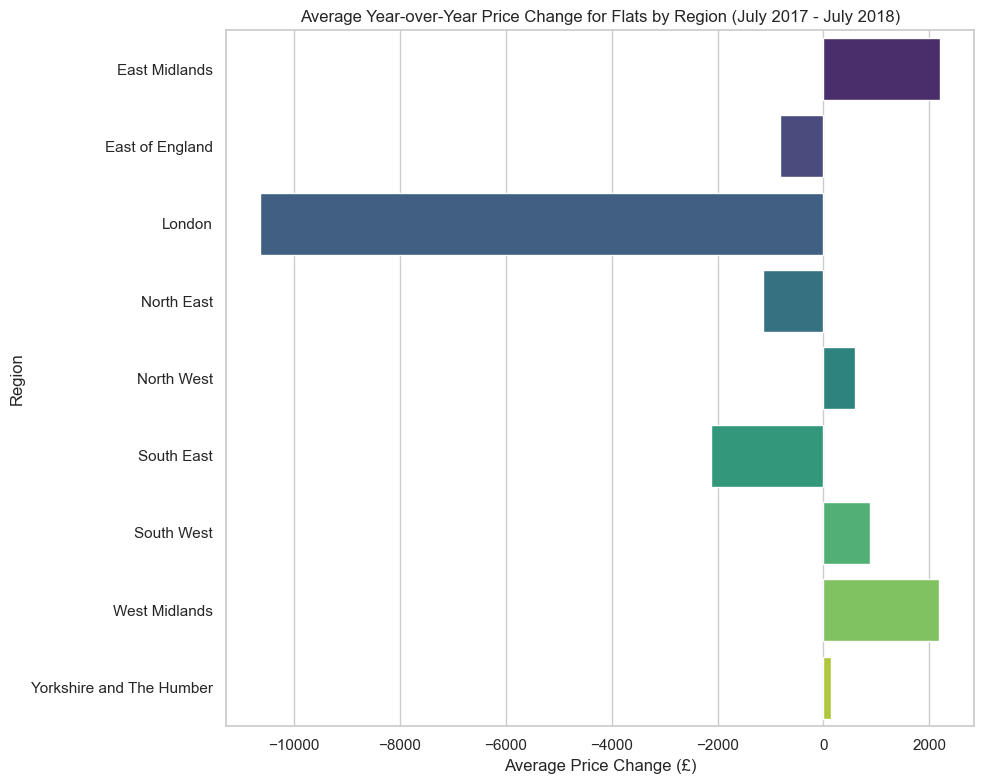

                 RegionName  Price_Change
0             East Midlands   2199.671726
1           East of England   -818.085073
2                    London -10640.615494
3                North East  -1135.787570
4                North West    592.528449
5                South East  -2118.463732
6                South West    883.504740
7             West Midlands   2178.365963
8  Yorkshire and The Humber    136.534193


In [105]:


# Convert 'Month' to a datetime object
area_data_with_region_df['Month'] = pd.to_datetime(area_data_with_region_df['Month'])

# Filter the DataFrame for entries from July 2017 and July 2018
july_data = area_data_with_region_df[
    (area_data_with_region_df['Month'].dt.month == 7) &
    (area_data_with_region_df['Month'].dt.year.isin([2017, 2018]))
]

# Pivot the data to compare 2017 and 2018 prices by Area
july_pivot = july_data.pivot_table(index='Area', columns='Month', values='Flat')

# Calculate the price change between July 2017 and July 2018 for each area
july_pivot['Price_Change'] = july_pivot.loc[:, '2018-07-01'] - july_pivot.loc[:, '2017-07-01']

# Reset the index to turn 'Area' back into a column
july_pivot_reset = july_pivot.reset_index()

# Merge the price changes with the original DataFrame to get 'RegionName'
merged_data = july_pivot_reset.merge(
    area_data_with_region_df[['Area', 'RegionName']].drop_duplicates(),
    on='Area'
)

# Aggregate the price changes by 'RegionName'
price_change_by_region = merged_data.groupby('RegionName')['Price_Change'].mean().reset_index()

# Visualization of the average price change per region
plt.figure(figsize=(10, 8))
sns.barplot(x='Price_Change', y='RegionName', data=price_change_by_region, palette='viridis')
plt.title('Average Year-over-Year Price Change for Flats by Region (July 2017 - July 2018)')
plt.xlabel('Average Price Change (£)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

# Print the result for interpretation
print(price_change_by_region)



- **London:** The most significant decrease in flat prices occurred in London, suggesting a notable cooling off in the housing market within this region. This could be due to a variety of factors, such as market saturation, economic uncertainty, or changes in housing policies.

- **Yorkshire and The Humber:** This region stands out as it experienced an increase in flat prices, which goes against the overall trend observed in other regions. The increase might be due to increased demand, economic growth, or other positive regional developments.

- **Other Regions:** The majority of the other regions, including the South East, East of England, and West Midlands, have seen a decrease in flat prices, though less pronounced than in London. This downward trend across multiple regions might suggest broader economic trends affecting the housing market.

- **Regional Variations:** The variation in price changes across regions underscores the localized nature of real estate markets. Each region's performance can be influenced by local demand and supply dynamics, employment rates, local economic growth, and even transportation developments.


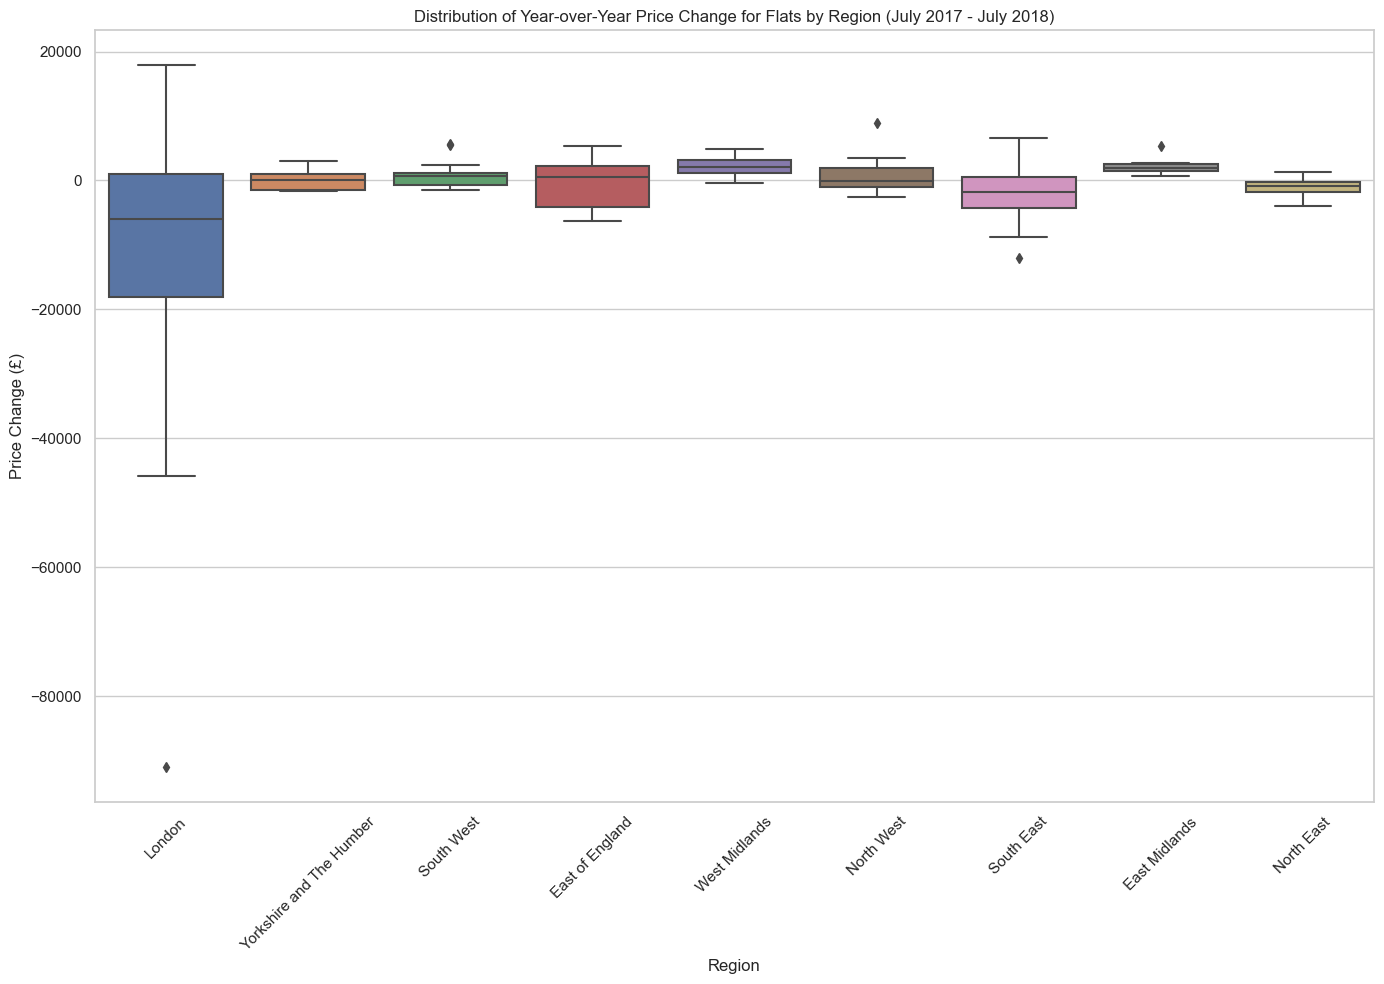

In [106]:
plt.figure(figsize=(14, 10))
sns.boxplot(x='RegionName', y='Price_Change', data=merged_data)
plt.xticks(rotation=45)
plt.title('Distribution of Year-over-Year Price Change for Flats by Region (July 2017 - July 2018)')
plt.xlabel('Region')
plt.ylabel('Price Change (£)')
plt.tight_layout()
plt.show()


Based on the box plot visualization for the distribution of year-over-year price change for flats by region between July 2017 and July 2018, we can observe the following patterns:

**Variation**: London exhibits the greatest variation in price change, with a median that suggests a decrease in prices. The range of changes in London is also quite broad, indicating significant disparities within the region.

**Stability**: Yorkshire and The Humber stands out with a median close to zero, indicating stability in flat prices over the year. The interquartile range is tight, suggesting less variability in price changes across the area.

**Decrease in Most Regions**: Several regions, such as the South East, East of England, and West Midlands, also show a median price change below zero, which points to a general decrease in flat prices.

**Outliers**: There are a few outliers, particularly in London, indicating some areas with exceptionally high price drops or increases.







C:\Users\aashi\AppData\Local\Temp\ipykernel_31388\3964118955.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  london_data['Month'] = pd.to_datetime(london_data['Month'])


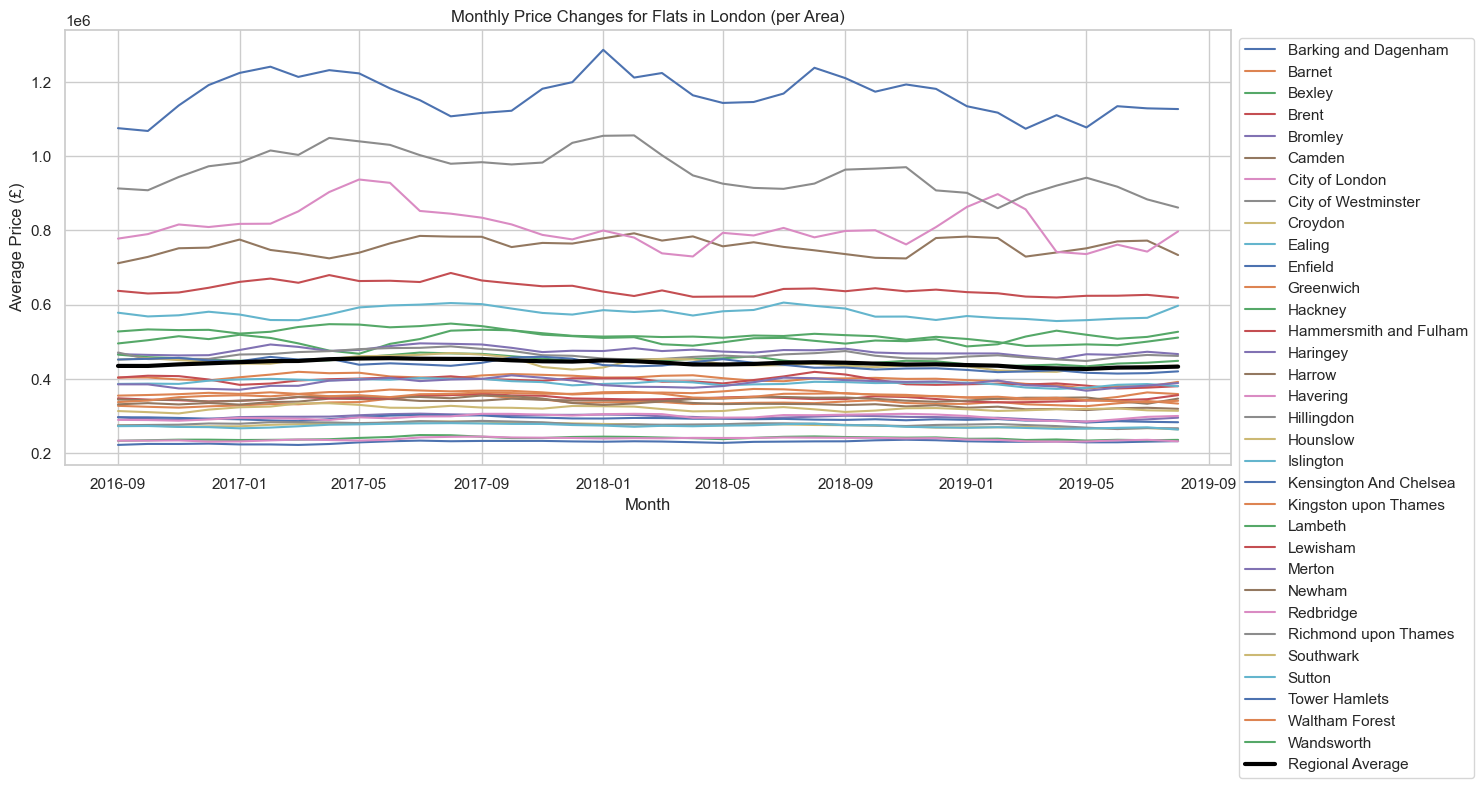

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter the data for the region(s) of interest
# For this example, we'll use 'London' as the region of interest
london_data = area_data_with_region_df[area_data_with_region_df['RegionName'] == 'London']

# Create a time series for flat prices for each area
# Ensure your 'Month' column is in the right datetime format
london_data['Month'] = pd.to_datetime(london_data['Month'])

# Pivot the data to get a time series for each 'Area'
london_time_series = london_data.pivot_table(index='Month', columns='Area', values='Flat')

# Step 3: Plot the time series for each area
plt.figure(figsize=(15, 7))
for area in london_time_series.columns:
    plt.plot(london_time_series.index, london_time_series[area], label=area)

# Optionally, add the regional average as a separate line
regional_average = london_time_series.mean(axis=1)
plt.plot(london_time_series.index, regional_average, label='Regional Average', color='black', linewidth=3)

plt.title('Monthly Price Changes for Flats in London (per Area)')
plt.xlabel('Month')
plt.ylabel('Average Price (£)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend out of the plot
plt.tight_layout()
plt.show()


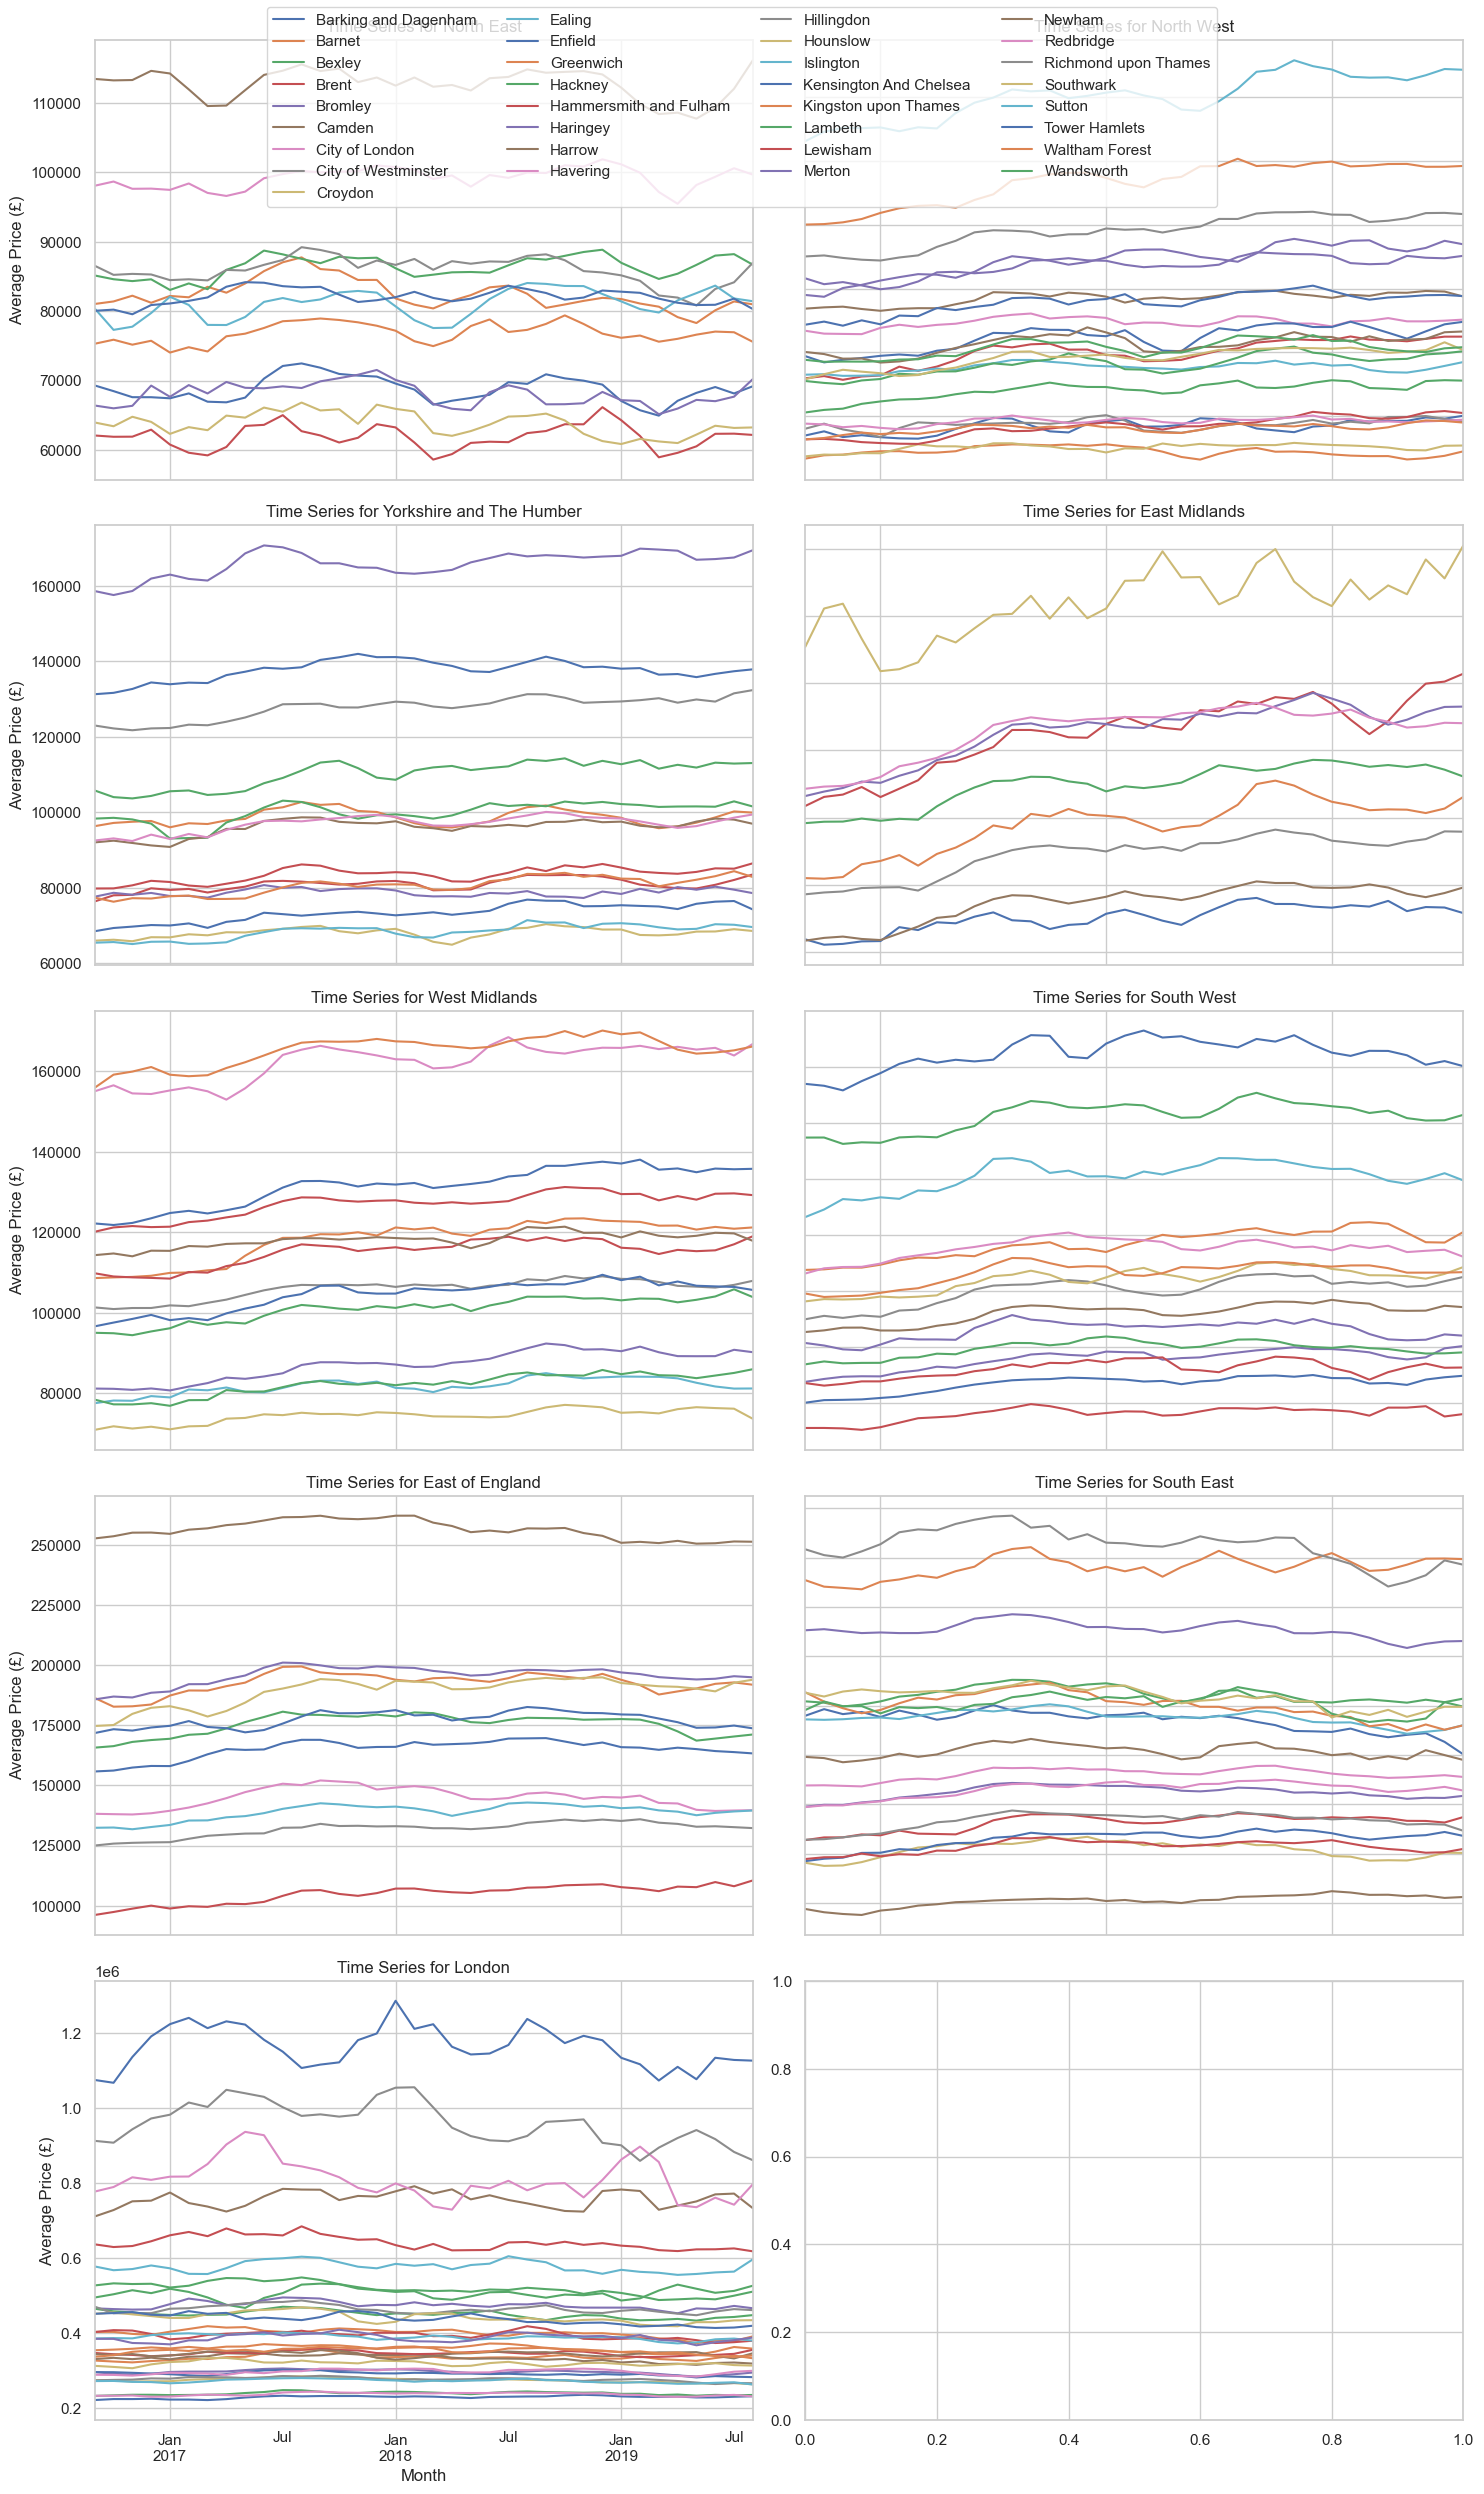

In [108]:


# Determine the number of unique regions to decide the grid size for subplots
unique_regions = area_data_with_region_df['RegionName'].unique()
num_regions = len(unique_regions)
n_cols = 2
n_rows = num_regions // n_cols + (num_regions % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5), squeeze=False)
axes = axes.flatten()  # Flatten the array for easy iteration

for i, region in enumerate(unique_regions):
    # Filter the DataFrame for the current region and pivot
    region_data = area_data_with_region_df[area_data_with_region_df['RegionName'] == region]
    time_series_data = region_data.pivot_table(index='Month', columns='Area', values='Flat')

    # Plot each area's time series in the region's subplot
    ax = axes[i]
    time_series_data.plot(ax=ax, legend=False)

    # Formatting the subplot
    ax.set_title(f'Time Series for {region}')
    ax.set_ylabel('Average Price (£)')
    ax.set_xlabel('Month')
    ax.label_outer()

# Adjust the layout
plt.tight_layout()

# Add a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)

# Show plot
plt.show()


The time series plots show diverse trends in flat prices across UK regions, reflecting the varying economic conditions within each area. London's market is particularly distinct, with a broad price range and notable volatility indicative of its dynamic nature. While some regions demonstrate an overall increase in property values, others exhibit stable or declining prices. Seasonal patterns and local economic events appear to influence these trends significantly. Anomalies within regions suggest localized factors at play, and the stark contrast in price scales between London and other regions is evident.

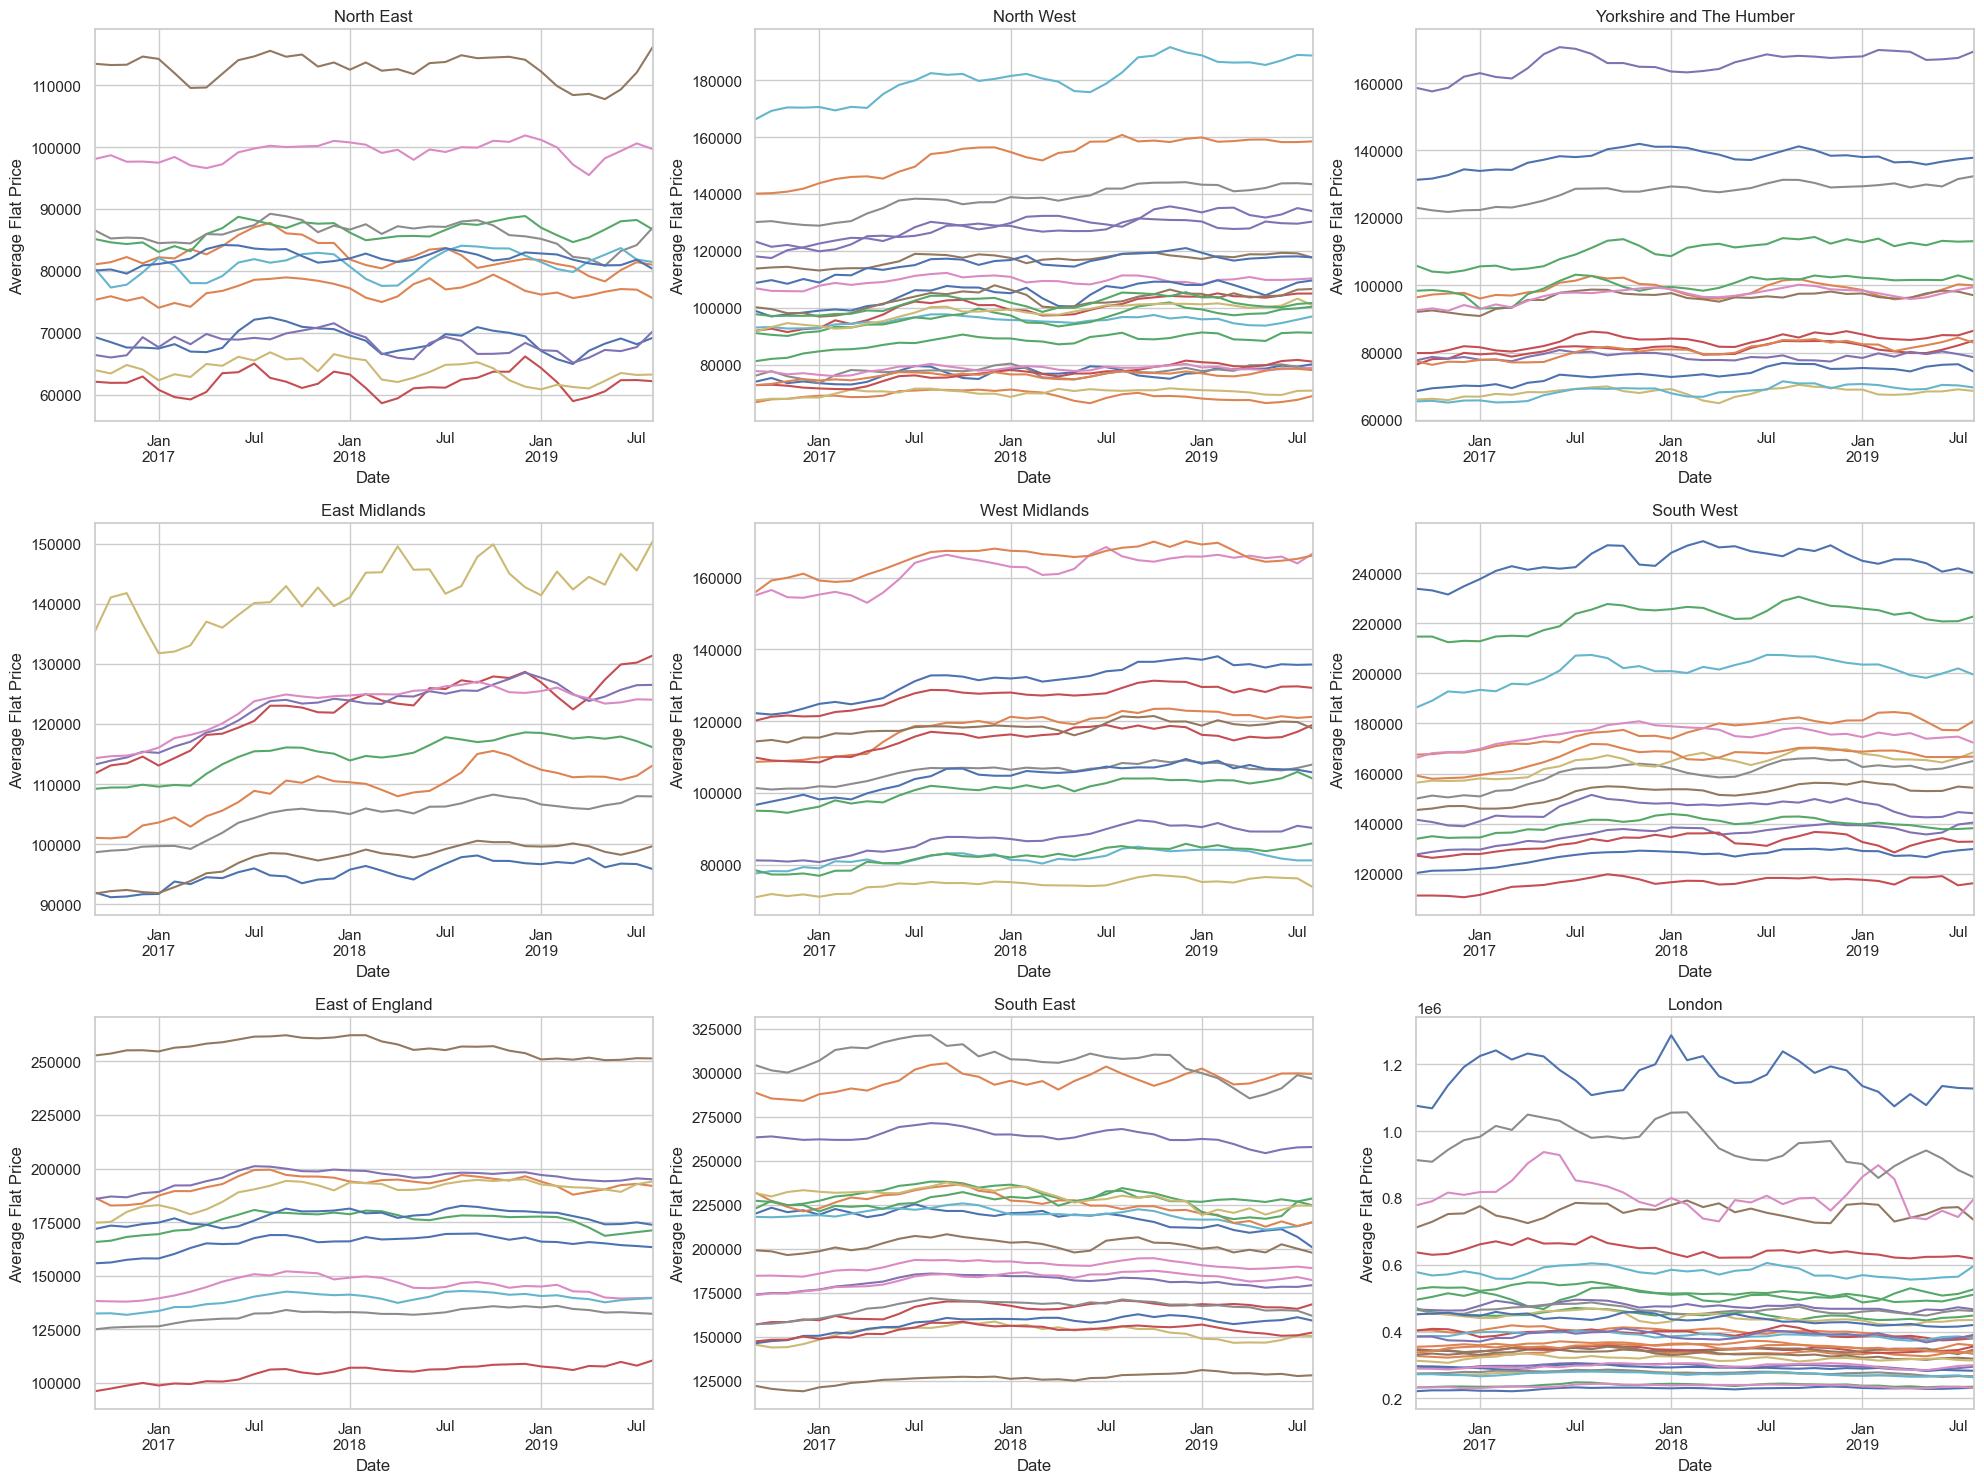

In [109]:
# First, ensure that 'Month' is in datetime format.
area_data_with_region_df['Month'] = pd.to_datetime(area_data_with_region_df['Month'])

# Determine the unique regions for creating subplots.
regions = area_data_with_region_df['RegionName'].unique()
num_regions = len(regions)

# Determine the layout of the subplots.
num_columns = 3
num_rows = -(-num_regions // num_columns)  # Ceiling division to get the number of rows needed.

# Create a figure and axes for the subplots.
fig, axs = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 5))
axs = axs.flatten()

# Plot time series data for each region in a separate subplot.
for i, region in enumerate(regions):
    # Filter data for the selected region.
    region_data = area_data_with_region_df[area_data_with_region_df['RegionName'] == region]
    # Pivot to get a separate column for each area's flat prices over time.
    region_time_series = region_data.pivot_table(index='Month', columns='Area', values='Flat')

    # Plot each area's time series in the region's subplot.
    region_time_series.plot(ax=axs[i], legend=False)
    axs[i].set_title(region)
    axs[i].set_ylabel('Average Flat Price')
    axs[i].set_xlabel('Date')

# Hide any unused subplots.
for ax in axs[num_regions:]:
    ax.set_visible(False)

# Adjust the layout so the subplots fit into the figure area.
plt.tight_layout()

# Show the plot.
plt.show()



visualization shows a series of line plots, each representing the average flat prices within various UK regions over time.

Here are the observations based on the visual data:

The time series analysis of UK flat prices from 2017 to 2019 reveals distinct regional price trends and potential seasonality effects. While a general upward trajectory in property values is observed, London's market is notably have  a wide price range, highlighting its unique position. Some regions show remarkable stability, while others suggest convergence in prices, indicating a narrowing gap between high and low-value areas. Anomalies within certain regions hint at localized influences on property values. These insights underscore the importance of considering both broader economic indicators and local developments to fully understand regional property market dynamics.

**Part 4: Statistical Analysis**
Use the area data in this section and the work (section 2.3) on price changes to investigate
whether there is evidence that the change in the price of flats has affected all the regions
similarly.
- Cross-tabulate the number of areas in which the price has increased and the number
has decreased, by region
- Use a chi-square test (using the G-test statistic) to determine whether there is
evidence that the regions differ.
- Interpret the results you obtain, including what you can and cannot determine from
the result.

In [111]:

import pandas as pd
from scipy.stats import chi2_contingency

# Filter the DataFrame for July 2017 and July 2018
july_2017 = area_data_with_region_df[(area_data_with_region_df['Month'].dt.month == 7) & (area_data_with_region_df['Month'].dt.year == 2017)][['Area', 'Flat']]
july_2018 = area_data_with_region_df[(area_data_with_region_df['Month'].dt.month == 7) & (area_data_with_region_df['Month'].dt.year == 2018)][['Area', 'Flat']]

july_2017.rename(columns={'Flat': 'Flat2017'}, inplace=True)
july_2018.rename(columns={'Flat': 'Flat2018'}, inplace=True)

price_comparison = pd.merge(july_2017, july_2018, on='Area')

# Calculate the price change
price_comparison['Price_Change'] = price_comparison['Flat2018'] - price_comparison['Flat2017']
price_comparison['Change_Category'] = price_comparison['Price_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')
price_comparison = price_comparison.merge(area_data_with_region_df[['Area', 'RegionName']].drop_duplicates(), on='Area')
# Create the crosstab
cross_tab = pd.crosstab(price_comparison['RegionName'], price_comparison['Change_Category'])

# The chi-square test
chi2_stat, p_val, dof, ex = chi2_contingency(cross_tab)

# Result for the crosstab and chi-square test results
cross_tab, chi2_stat, p_val, dof, ex



(Change_Category           Decrease  Increase
 RegionName                                  
 East Midlands                    0         9
 East of England                  5         6
 London                          23        10
 North East                       9         3
 North West                      12        11
 South East                      13         6
 South West                       6         9
 West Midlands                    2        12
 Yorkshire and The Humber         7         8,
 27.595360429623703,
 0.0005576314604275128,
 8,
 array([[ 4.58940397,  4.41059603],
        [ 5.60927152,  5.39072848],
        [16.82781457, 16.17218543],
        [ 6.1192053 ,  5.8807947 ],
        [11.72847682, 11.27152318],
        [ 9.68874172,  9.31125828],
        [ 7.64900662,  7.35099338],
        [ 7.13907285,  6.86092715],
        [ 7.64900662,  7.35099338]]))

Interpretation of the price changes of flats across different regions.

**Chi-Square Statistic (27.595):** This value measures how much the observed counts - number of areas with price increases or decreases,that deviate from the expected counts under the null hypothesis so there is no association between the regions and the direction of price changes.

**p-value (0.0005576):** Rejected the null hypothesis because  p-value is significantly less than the common alpha level of 0.05. This means there is a association between the regions and the direction of price change for flats.The low p-value indicates that there is a  difference in how flat prices have changed across different regions from July 2017 to July 2018. The regions do not all behave similarly in terms of flat price changes.

**Degrees of Freedom (8):** It’s used to determine the critical value from the chi-square distribution.

**Expected Frequencies:** The expected frequencies are calculated based on the marginal totals of the table. These tell us what the distribution of increases and decreases would look like if there were no regional effects.

### Interpretation:

**Regional Differences:**
   - The observed distribution of price changes across the regions does not occur by chance and is instead likely influenced by regional factors.

**Cannot Determine:**
   - This test doesn't tell us which specific regions are driving this difference.
   - The test doesn't indicate the scale of the price changes, only that the distribution of the changes (increase vs. decrease) is not random.
   - We cannot determine the causal factors for the changes in prices from this test alone.


The results of the chi-square test suggest that the property market dynamics vary significantly across different regions , some regions experiencing more increases in flat prices, while others see more decreases.